
## Programming Assignment 3 and 4
### 111 Computational Physics Lab  
  >Author: Yuan-Yen Peng 108000204  
  >Email: garyphys0915@gapp.nthu.edu.com  
  >Date: Nov. 11, 2022  
  >LINCENCE: MIT

#### 3. Forced oscillator

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import mysolver as solver

In [132]:
def oscillator(y,t, lam, wf, F0, K, M):
        '''
        This is the function (osci) defined in the [position, velocity] 
        and [derivative(position), derivative(velocity)]
        :param y: [position, velocity]
        :param t: time (time varying)
        :param lam: \lambda ==> damping constant
        :param wf: \omega_f ==> forceing frequency
        :param F0: initial forceing force
        :param K: spring constants
        :param M: mass constant
        '''
        yder =  np.zeros(2)
        yder[0] = y[1]
        yder[1] = -y[0] * K/M - y[1] * lam / M + F0 * np.cos(wf * t) / M # the difinition of the acceleration, which is depend on the position.

        return yder

In [133]:
def plot(u1, u2, u3, wf, lam):
  '''
  This is the plotting function
  :param ui: u is outcomes. (i = 1, 2, 3) ==> (Euler, RK2, RK4) -> Array
  :param wf: wf is the specified \omega_f. -> Array
  :param lam: the value of lambda. 
  '''
  # plt.plot(wf, u1, "r", alpha = 0.3, label = "Euler")
  # plt.plot(wf, u2, "g", alpha = 0.3, label = "RK2")
  plt.plot(wf, u3, alpha = 0.5, label = f"$\lambda\ =\ {lam}$")
  plt.title(f"Forced")
  plt.ylabel("$D\quad [cm]$")
  plt.xlabel("$\omega_{f}\quad [rad*s^{-1}]$")
  plt.legend(loc = "best")

In [134]:
def CIR(I1, I2, I3, V1, V2, V3, wf):
  '''
  This is the plotting function
  :param ui: u is outcomes. (i = 1, 2, 3) ==> (Euler, RK2, RK4) -> Array
  :param wf: wf is the specified \omega_f. -> Array
  :param lam: the value of lambda. 
  '''
  # plt.plot(I1, V1, "r", alpha = 0.3, label = "Euler")
  # plt.plot(I2, V2, "g", alpha = 0.3, label = "RK2")
  plt.plot(I3, V3, alpha = 0.8, label = f"$\omega\ =\ {np.round(float(wf), 2)}$")
  plt.title(f"RLC circuit")
  plt.ylabel("$V\quad [V]$")
  plt.xlabel("$I\quad [A]$")
  plt.legend(loc = "best", ncol = 3)

In [135]:
def para(lam):
  N, t = int(1e3), 50 # divided into 100
  dt = t/N
  T = np.linspace(0, 50, N)

  M, K = 1, 1
  A = 1 # initial amplitude

  phi = - np.pi/2
  r = lam/(2 * M)
  F0 = 0.5
  space = 0.01
  wf = np.arange(0.5, 1.5 + space, space) # [start, stop)
  w0 = np.sqrt(K/M)
  w = np.sqrt(abs(np.square(w0) - np.square(r)))

  y0  = np.zeros(2)
  y0[0]= 0 # initial position
  y0[1] = -A * r * np.cos(phi) - A * w * np.sin(phi)

  # x = np.linspace(0, t, N) # from 0 to t divided by N+1, i.e., N+1 equal parts.

  ind = np.where(T >= 40)
  RANGE = np.array([ind])

  D1 = np.zeros(len(wf))
  D2 = np.zeros(len(wf))
  D3 = np.zeros(len(wf))

  for i in range(len(wf)):
    sol1 = solver.solve_ivp(oscillator, y0, t, dt, N, method="Euler", args=(lam, wf[i], F0, K, M))[0]
    D1[i] = np.average(np.abs(sol1[RANGE]))
    sol2 = solver.solve_ivp(oscillator, y0, t, dt, N, method="RK2", args=(lam, wf[i], F0, K, M))[0]
    D2[i] = np.average(np.abs(sol2[RANGE]))
    sol3 = solver.solve_ivp(oscillator, y0, t, dt, N, method="RK4", args=(lam, wf[i], F0, K, M))[0]
    D3[i] = np.average(np.abs(sol3[RANGE]))

  D3_MAX_ind = np.where(D3 == np.max(D3))
  wf_MAX = float(wf[D3_MAX_ind])
  print(f"When \lambda = {lam}, the resonance frequency is on \omega_f = {wf_MAX}, and the average amplitude is D = {float(np.max(D3))}.")
  
  return D1, D2, D3, wf, lam

When \lambda = 0.01, the resonance frequency is on \omega_f = 0.9900000000000004, and the average amplitude is D = 6.942538155782542.
When \lambda = 0.1, the resonance frequency is on \omega_f = 0.9900000000000004, and the average amplitude is D = 2.9366564535353348.
When \lambda = 0.3, the resonance frequency is on \omega_f = 0.9800000000000004, and the average amplitude is D = 1.0935404649467313.


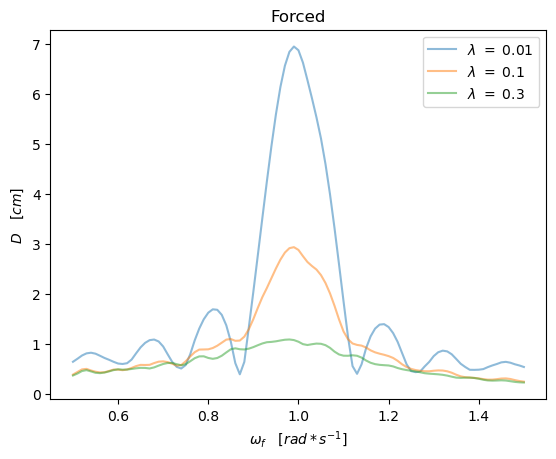

In [136]:
out = para(0.01)
plot(out[0], out[1], out[2], out[3], out[4])
out = para(0.1)
plot(out[0], out[1], out[2], out[3], out[4])
out = para(0.3)
plot(out[0], out[1], out[2], out[3], out[4])

#### 4. RLC circuit

In [137]:
def RLC(y, t, L, R, C, wf, E0):
        '''
        This is the function (osci) defined in the [position, velocity] 
        and [derivative(position), derivative(velocity)]
        :param y: [position, velocity]
        :param t: time (time varying)
        :param lam: \lambda ==> damping constant
        :param wf: \omega_f ==> forceing frequency
        :param F0: initial forceing force
        :param K: spring constants
        :param M: mass constant
        '''
        yder =  np.zeros(2)
        yder[0] = y[1]
        yder[1] = -y[0] / (C * L) - y[1] * R / L + E0 * np.cos(wf * t) / L # the difinition of the acceleration, which is depend on the position.

        return yder

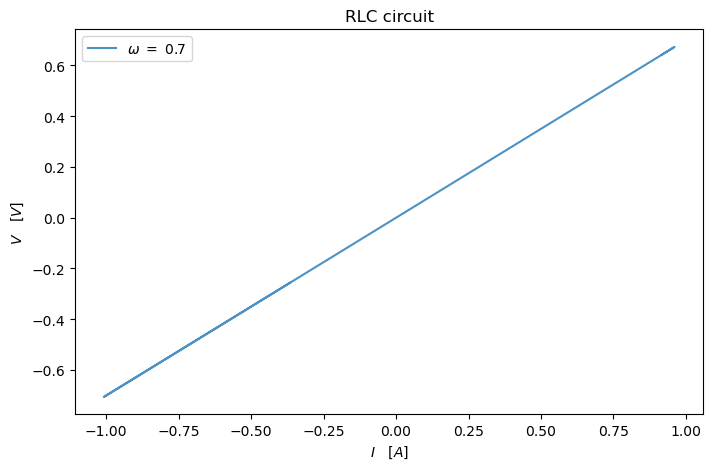

In [138]:
N, t = int(1e3), 50 # divided into 100
dt = t/N
T = np.linspace(0, 50, N)

L, C = 1, 1
A = 1 # initial amplitude
phi = - np.pi/2

R = 0.8
r = R / (2 * L)
E0 = 1
# space = 0.1
# wf = np.arange(0.3, 1.5 + space, space) # [start, stop)
wf = np.array([0.7])
w0 = np.sqrt(1 / (C * L))
w = np.sqrt(abs(np.square(w0) - np.square(r)))

y0  = np.zeros(2)
y0[0]= 0 # initial position
y0[1] = -A * r * np.cos(phi) - A * w * np.sin(phi)

# x = np.linspace(0, t, N) # from 0 to t divided by N+1, i.e., N+1 equal parts.

plt.figure(figsize = (8.1,5))
for i in range(len(wf)):
  X_L = wf[i] * L
  I1 = solver.solve_ivp(RLC, y0, t, dt, N, method="Euler", args=(L, R, C, wf[i], E0))[1]
  V1 = I1 * X_L
  I2 = solver.solve_ivp(RLC, y0, t, dt, N, method="RK2", args=(L, R, C, wf[i], E0))[1]
  V2 = I2 * X_L
  I3 = solver.solve_ivp(RLC, y0, t, dt, N, method="RK4", args=(L, R, C, wf[i], E0))[1]
  V3 = I3 * X_L
  CIR(I1, I2, I3, V1, V2, V3, wf[i])

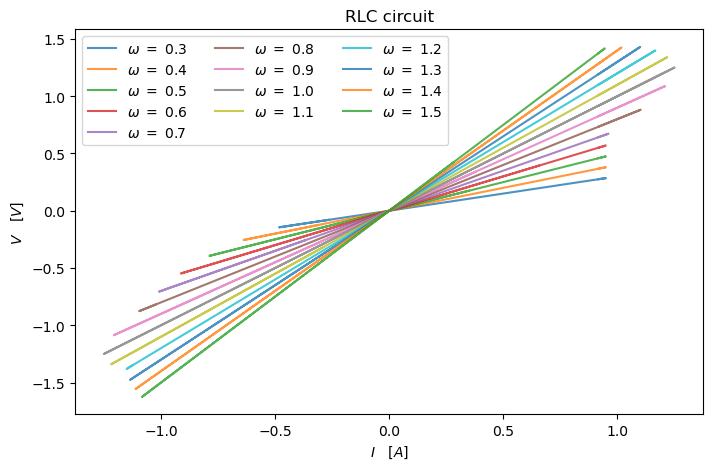

In [139]:
N, t = int(1e3), 50 # divided into 100
dt = t/N
T = np.linspace(0, 50, N)

L, C = 1, 1
A = 1 # initial amplitude
phi = - np.pi/2

R = 0.8
r = R / (2 * L)
E0 = 1
space = 0.1
wf = np.arange(0.3, 1.5 + space, space) # [start, stop)
# wf = np.array([0.7])
w0 = np.sqrt(1 / (C * L))
w = np.sqrt(abs(np.square(w0) - np.square(r)))

y0  = np.zeros(2)
y0[0]= 0 # initial position
y0[1] = -A * r * np.cos(phi) - A * w * np.sin(phi)

# x = np.linspace(0, t, N) # from 0 to t divided by N+1, i.e., N+1 equal parts.

plt.figure(figsize = (8.1,5))
for i in range(len(wf)):
  X_L = wf[i] * L
  I1 = solver.solve_ivp(RLC, y0, t, dt, N, method="Euler", args=(L, R, C, wf[i], E0))[1]
  V1 = I1 * X_L
  I2 = solver.solve_ivp(RLC, y0, t, dt, N, method="RK2", args=(L, R, C, wf[i], E0))[1]
  V2 = I2 * X_L
  I3 = solver.solve_ivp(RLC, y0, t, dt, N, method="RK4", args=(L, R, C, wf[i], E0))[1]
  V3 = I3 * X_L
  CIR(I1, I2, I3, V1, V2, V3, wf[i])